#  Brain Stroke analysis

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
BrainS=pd.read_csv('data/full_data.csv')
BrainS.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


### Data PreProcessing

In [156]:
BrainS.isna().any().sum()

0

il n'y a aucune valeur manquante dans notre tableau de données

In [157]:
for (y,x) in  BrainS.select_dtypes(include=['object']).iteritems():
    print( y,x.unique())

gender ['Male' 'Female']
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


we see here that the column smoking_status contains messing values as  <font color='red'>"Unknown</font> values 

In [160]:
BrainS.loc[BrainS['age']<10]=BrainS.loc[BrainS['age']<10].replace('Unknown','never smoked')
BrainS=BrainS.replace('Unknown',str(BrainS['smoking_status'].mode()))

In [162]:
sum(BrainS['smoking_status']=='Unknown')

0

### EDA 

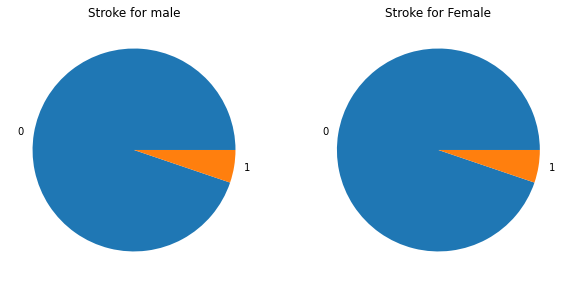

In [6]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches([10,5])
maleStroke=BrainS[BrainS['gender']=='Male'].groupby('stroke').count().iloc[:,2]
ax[0].pie(maleStroke, labels=['0','1'])
ax[0].set_title("Stroke for male")
femaleStroke=BrainS[BrainS['gender']=='Female'].groupby('stroke').count().iloc[:,2]
ax[1].pie(maleStroke, labels=['0','1'])
ax[1].set_title("Stroke for Female")
plt.show()


***conlusions***

On constate dans les deux figure que la portion des passinent ayant une accident vasuculaire cérébrale et présque le même pour les deux genres donc on peut conclure que 
les accidents vasculaires cérébrals ne dépend pas du genre des passients

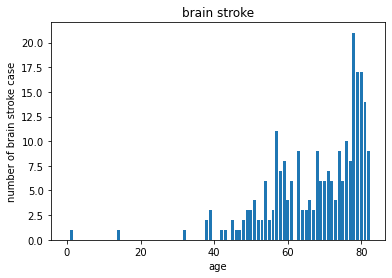

In [36]:
Brainage=BrainS.groupby('age').sum()
fig, ax=plt.subplots()
ax.bar(Brainage.index,age['stroke'])
ax.set_title('brain stroke')
ax.set_xlabel('age')
ax.set_ylabel('number of brain stroke case')
plt.show()

smoking status

<BarContainer object of 4 artists>

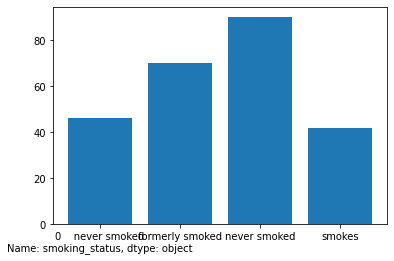

In [171]:
result=BrainS.groupby('smoking_status').sum()
plt.bar(result.index,result['stroke'])